# 有限井戸型ポテンシャルの解法と数値計算

参考にしたサイトなど
- [第5章 井戸型ポテンシャルでの束縛状態(QMI10_chap05.pdf) - 量子力学第一（平成２２年度）| 武藤研究室（東工大）](http://www.th.phys.titech.ac.jp/~muto/lectures/QMI10/QMI10_chap05.pdf)
- 


## 一次元無限井戸型ポテンシャルの解

$$V(x) = \begin{cases}V_0&x< -b/2, b/2 < x\\0&\text{other}\end{cases}$$

のポテンシャル下での時間に依存しないSchrödinger方程式

$$\hat{H} ψ = \Biggl[ \underbrace{-\frac{\hbar}{2m}\frac{d}{dx}}_{\hat{H}_0} + V(x) \Biggr] ψ = Eψ$$

を解くと，

$$ψ(x) = \sqrt{\frac{2}{b}}\sin{\frac{nπ}{b}\left(x + \frac{b}{2}\right)}, n = 1, 2, ...$$

In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
"""initial settings"""
rcParams['figure.dpi'] = 150
rcParams['font.sans-serif'] = 'Inter'

Hello!


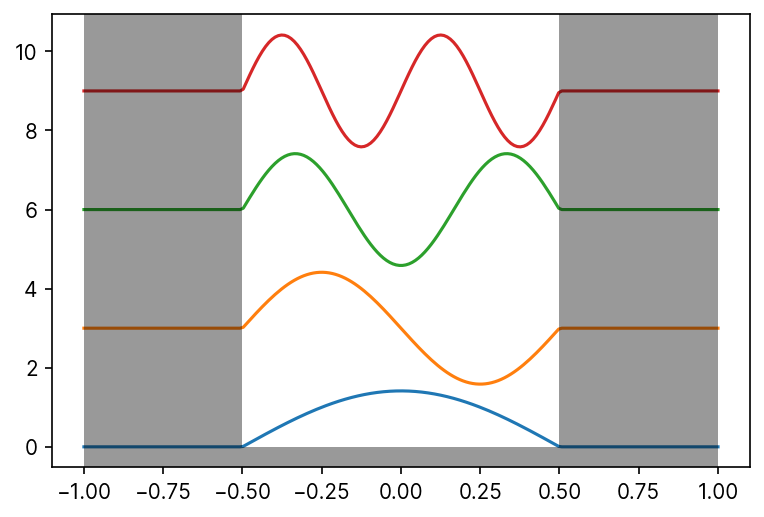

In [2]:
from copy import copy
import numpy as np
from numpy import sin, cos, sqrt, pi
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors
from matplotlib.colors import to_rgb, to_rgba
print('Hello!')

"""
width of wall
"""
b:float = 1.0

def get_eigenfunc_value(main_qnum:int, x:float)->float:
    return sqrt(2/b) * sin((main_qnum * pi) * (x + b/2)/ b) if -b/2 <= x <= b/2 else 0 


max_ylim:float = 10
x_range:float = 1.0
diff:float = 3.0
fig: plt.Figure = plt.figure()
ax: plt.Axes = fig.subplots()

x = np.linspace(-x_range, x_range, 200)


for main_quantum_num in range(1, 5):    
    ax.plot(x, [get_eigenfunc_value(main_quantum_num, i) + diff * main_quantum_num - diff for i in x])

r_height, r_depth = 40, 2
# draw wall
rl:patches.Rectangle = patches.Rectangle(xy=(-1.0, 0), width=x_range - b/2, height=r_height, fc=to_rgba('black', .4), zorder=10)
rr:patches.Rectangle = copy(rl)
rb:patches.Rectangle = copy(rl)
rr.set_xy((b/2, 0))
rb.set_y(-r_depth)
rb.set_height(r_depth)
rb.set_width(x_range * 2)
ax.add_patch(rl)
ax.add_patch(rr)
ax.add_patch(rb)

## 解析的に可能な範囲の計算
